In [92]:
import numpy as np
from matplotlib import pyplot as plt
import csv

%matplotlib inline

import lib_ecofun as lef

In [124]:
from importlib import reload
reload(lef)

<module 'lib_ecofun' from '/home/fedef/Research/abstractsepapers/papers/DREAM/codes/lib_ecofun.py'>

In [94]:
from scipy.optimize import curve_fit, minimize

In [96]:
def cost_function(parset, parnames = ['beta_0', 'gamma_g', 'growth', 'delta_sig'], params = lef.default_params.copy(), year_ini = 2015, inicond = lef.inicond_2015, verbose = False, all_green = False, I_weight = 1.):
    for parval, pnam in zip(parset, parnames):
        params[pnam] = parval
    
    params['gamma_f'] = params['gamma_g']
    
    resu = lef.run_model(inicond = inicond, params = params, n_iter = 2025 - year_ini, verbose = verbose, rule = 'maxgreen')
    
    cost = lef.costfun_1524(resu, year_ini = year_ini, I_weight = I_weight, all_green = all_green)
    if verbose: print(cost)

    return cost

# Fitting to observations
## 1.1. Using only 2015-2023 for both energy share and investment share. Starting in 2015

In [63]:
lef.inicond_2015

{'Y_ini': 1, 'Kg_ini': 0.10504495, 'Kf_ini': 10.89495505}

In [64]:
lef.inicond_2000

{'Y_ini': 1, 'Kg_ini': 0.078158455, 'Kf_ini': 10.921841545}

### 1.1.1 Using original data on green investment from World Bank (all_green = True)

In [107]:
lef.inicond_2015

{'Y_ini': 1, 'Kg_ini': 0.10504495, 'Kf_ini': 1.7899101}

In [114]:
# Initial guess for the parameters
# initial_guess = [-0.2, 0.65, 0.015, 0.01, 0.7]
# bounds = [(-0.5, 0.5), (0.3, 0.9), (0.01, 0.03), (0.0, 0.03), (0.3, 1.3)]

parnames = ['beta_0', 'a', 'delta_sig']
initial_guess = [-0.2, 1., 0.7]
bounds = [(-0.5, 0.5), (0.1, 2.), (0.05, 2.)]#, (0.5, 1.5)]
params = lef.default_params.copy()
params['growth'] = 0.029

# Step 5: Use an optimization function to find the best parameters
verbose = False
all_green = True
I_weight = 1

result = minimize(cost_function, initial_guess, bounds = bounds, args = (parnames, params, 2015, lef.inicond_2015, verbose, all_green, I_weight), tol = 1e-10)
print(result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 58.85670340730843
        x: [ 2.026e-01  7.634e-01  5.506e-01]
      nit: 16
      jac: [-4.633e-04 -4.633e-04  1.208e-04]
     nfev: 76
     njev: 19
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


beta_0 0.20255341538287486
a 0.7633778231301478
delta_sig 0.5506408834104055
{'Y_ini': 1, 'Kg_ini': 0.10504495, 'Kf_ini': 1.7899101}
      0.44     -0.45      0.08      0.92      0.01      0.36      0.02      0.02
      0.48     -0.37      0.09      0.94      0.02      0.37      0.02      0.02
      0.52     -0.31      0.11      0.95      0.02      0.38      0.02      0.02
      0.54     -0.25      0.12      0.97      0.03      0.39      0.02      0.02
      0.56     -0.20      0.14      0.99      0.03      0.39      0.02      0.02
      0.58     -0.16      0.15      1.00      0.04      0.40      0.03      0.02
      0.60     -0.13      0.17      1.02      0.04      0.41      0.03      0.02
      0.61     -0.10      0.19      1.03      0.05      0.41      0.03      0.02
      0.61     -0.08      0.21      1.05      0.06      0.42      0.03      0.02
      0.62     -0.07      0.23      1.06      0.07      0.43      0.03      0.02
      0.62     -0.05      0.25      1.08      0.08      0

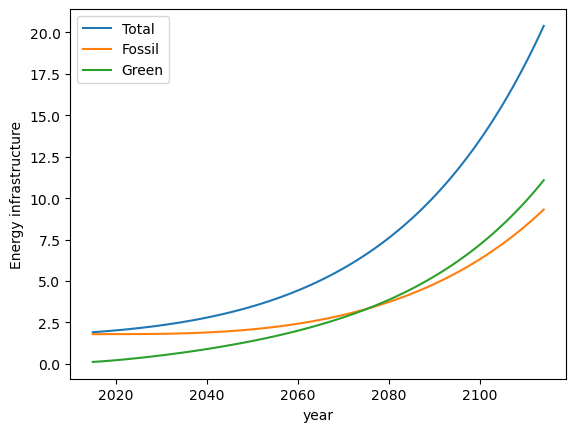

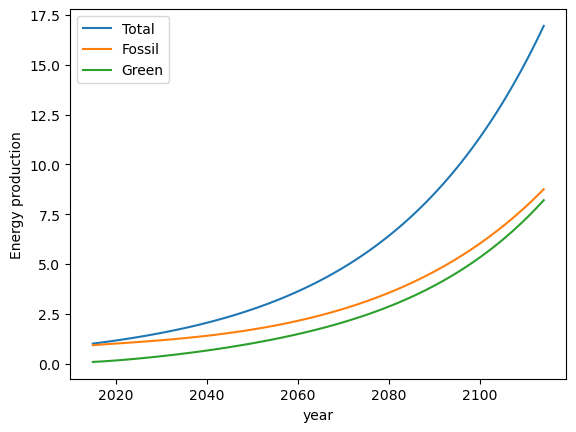

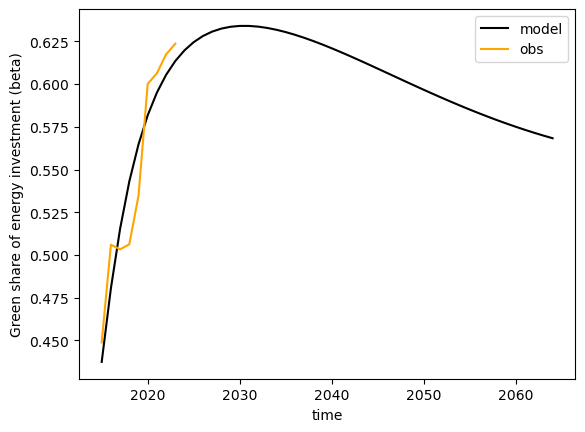

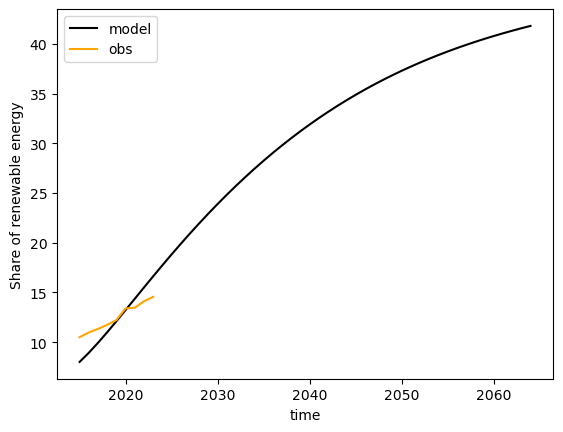

In [115]:
params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

for par, parval in zip(parnames, result.x):
    print(par, parval)
    params[par] = parval

inico = lef.inicond_2015.copy()
# inico['Kf_ini'] += 2
print(inico)
resu = lef.run_model(inicond = inico, params = params, n_iter = 100, verbose = True, rule = 'maxgreen')
lef.plot_resu(resu, year_ini = 2015)
lef.plot_resuvsobs(resu, year_ini = 2015, all_green = True)

print(2015 + resu['year_peak'], 2015 + resu['year_halved'], 2015 + resu['year_zero'])

In [56]:
resu.keys()

dict_keys(['Y', 'Kg', 'Kf', 'E', 'Eg', 'Ef', 'Ig', 'If', 'Pg', 'Pf', 'success', 'year_zero', 'year_peak', 'year_halved'])

### 1.1.2. Using "modified" data on green investment, considering only investment in green energy production

In [120]:
# Initial guess for the parameters
# initial_guess = [-0.2, 0.65, 0.015, 0.01, 0.7]
# bounds = [(-0.5, 0.5), (0.3, 0.9), (0.01, 0.03), (0.0, 0.03), (0.3, 1.3)]

parnames = ['beta_0', 'a', 'delta_sig']
initial_guess = [0.2, 1., 0.7]#, 1.]
#bounds = [(-0.5, 0.5), (0.3, 0.9), (0.01, 0.02), (0.3, 1.3)]#, (0.5, 1.5)]
bounds = [(-0.5, 0.5), (0.1, 2.), (0.3, 1.3)]

params = lef.default_params.copy()
params['growth'] = 0.029

# Step 5: Use an optimization function to find the best parameters
verbose = False
all_green = False
I_weight = 0.1

result = minimize(cost_function, initial_guess, bounds = bounds, args = (parnames, params, 2015, lef.inicond_2015, verbose, all_green, I_weight), tol = 1e-10)
print(result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 8.72938740708624
        x: [-1.630e-01  9.625e-01  3.000e-01]
      nit: 21
      jac: [ 3.126e-05  3.340e-05  5.578e+01]
     nfev: 140
     njev: 35
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


### Note: this fit is extremely sensitive to the range allowed for growth. 
- 0.01-0.03 gives: x: [-1.373e-01  7.319e-01  2.288e-02  3.045e-01]
- 0.01-0.02 gives: x: [ 8.072e-02  4.689e-01  2.000e-02  3.000e-01]

the value of beta0 and delta_sig change the scenario dramatically!!

should try to:
- fix value for growth;
- understand the interaction between beta0 and delta_sig;
- beta0 has physical sense (public investment), but delta_sig? represents noise in the response which is difficult to interprete
- understand the role of prices


beta_0 -0.16301988303008555
a 0.9624558660283407
delta_sig 0.3
      0.24     -0.10      0.10      0.90      0.02      0.35      0.01      0.03
      0.27     -0.04      0.11      0.90      0.02      0.36      0.01      0.03
      0.30      0.02      0.12      0.90      0.02      0.36      0.01      0.03
      0.34      0.08      0.13      0.90      0.03      0.36      0.01      0.03
      0.37      0.14      0.14      0.90      0.03      0.36      0.01      0.02
      0.41      0.20      0.15      0.90      0.04      0.36      0.02      0.02
      0.44      0.27      0.16      0.90      0.04      0.35      0.02      0.02
      0.47      0.33      0.18      0.89      0.05      0.35      0.02      0.02
      0.50      0.39      0.20      0.89      0.05      0.35      0.02      0.02
      0.53      0.46      0.21      0.88      0.06      0.35      0.02      0.02
      0.56      0.52      0.23      0.87      0.07      0.34      0.02      0.02
Fossil infrastructure decreasing! 0.0182389411

/home/fedef/Research/abstractsepapers/papers/DREAM/codes/lib_ecofun.py:242: RuntimeWarning: divide by zero encountered in scalar divide
  Y = GDP(Y, growth = growth)


Plotting only data regarding investment on green power production (only part of what world bank considers green investment)
2018 2051 2066


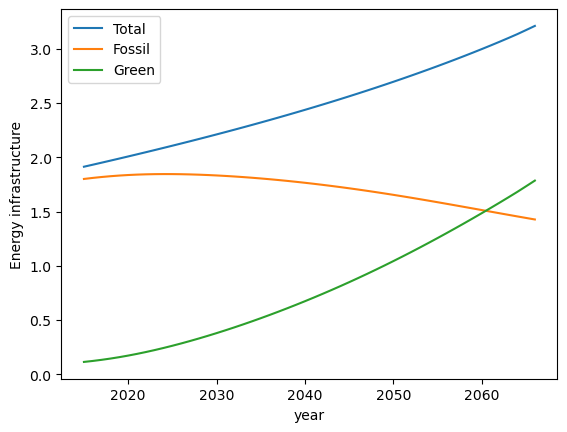

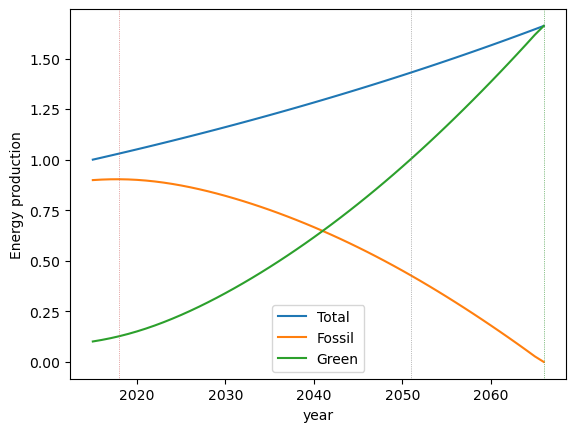

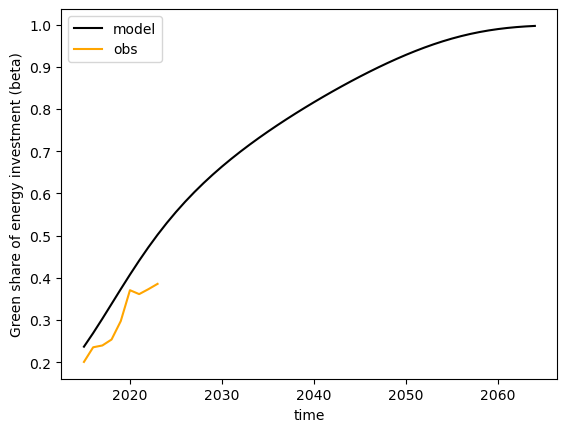

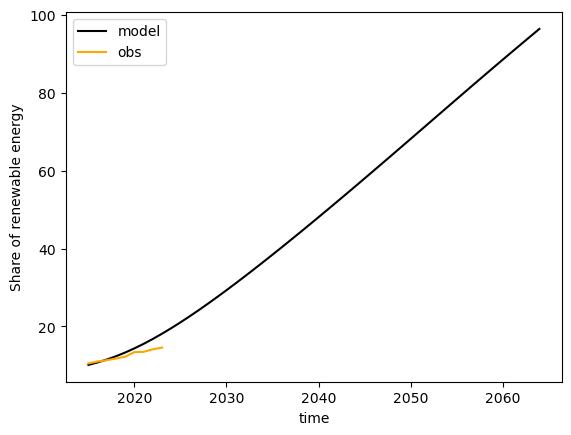

In [121]:
params = lef.default_params.copy()
# params['beta_0'], params['gamma_g'], params['growth'], params['delta_sig'] = result.x

for par, parval in zip(parnames, result.x):
    print(par, parval)
    params[par] = parval

resu = lef.run_model(inicond = lef.inicond_2015, params = params, n_iter = 100, verbose = True, rule = 'maxgreen')
lef.plot_resu(resu, year_ini = 2015)
lef.plot_resuvsobs(resu, year_ini = 2015, all_green = all_green)

print(2015 + resu['year_peak'], 2015 + resu['year_halved'], 2015 + resu['year_zero'])

## 1.2. Same, but starting in 2008

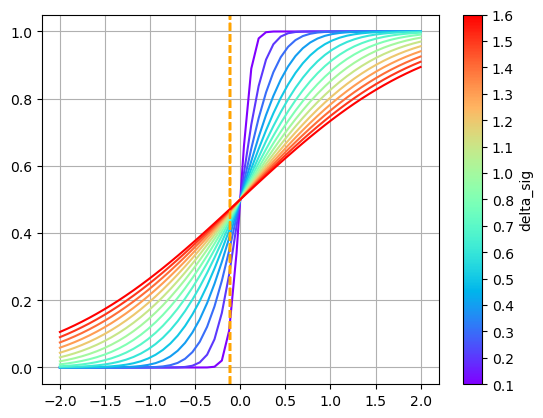

In [133]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

num_lines = 15
# Create equally spaced colors from the "rainbow" colormap
colors = plt.cm.rainbow(np.linspace(0, 1, num_lines))

beta_0 = params['beta_0']
delta_sig = params['delta_sig']

fig, ax = plt.subplots()

x = np.linspace(-2, 2)
for delta_sig, col in zip(np.linspace(0.1, 1.6, num_lines), colors):
    ax.plot(x, lef.cdf(x, sigma = delta_sig), color = col)
    ax.axvline(beta_0, color = 'orange', ls = '--')

ax.grid()

# Create a colorbar
norm = Normalize(vmin=0, vmax=num_lines - 1)  # Normalize based on the number of lines
sm = ScalarMappable(cmap='rainbow', norm=norm)
sm.set_array([])  # Required for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm, ticks=np.linspace(0, num_lines - 1, num_lines), ax = ax)

# Customize colorbar labels
cbar.set_label('delta_sig')
cbar.set_ticks(range(num_lines))
cbar.set_ticklabels(['{:3.1f}'.format(i) for i in np.linspace(0.1, 1.6, num_lines)])

In [134]:
parnames = ['beta_0', 'r_inv', 'a', 'delta_sig']
initial_guess = [0.2, 0.1, 1., 0.7]#, 1.]
bounds = [(-0.5, 0.5), (0.01, 0.4), (0.5, 1.5), (0.2, 2.)]#, (0.5, 1.5)]

params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

# Step 5: Use an optimization function to find the best parameters
result = minimize(cost_function, initial_guess, bounds = bounds, args = (parnames, params, 2008, lef.inicond_yr(2008), False), tol = 1e-10)
print(result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 31.772027640090982
        x: [-1.381e-01  1.095e-01  9.961e-01  2.124e-01]
      nit: 60
      jac: [ 8.334e+01  2.533e+02  6.424e+01  5.430e+01]
     nfev: 450
     njev: 90
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


Plotting only data regarding investment on green power production (only part of what world bank considers green investment)
2067 2089 2096


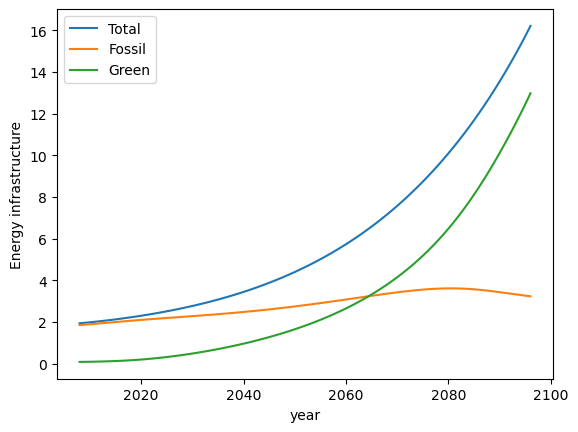

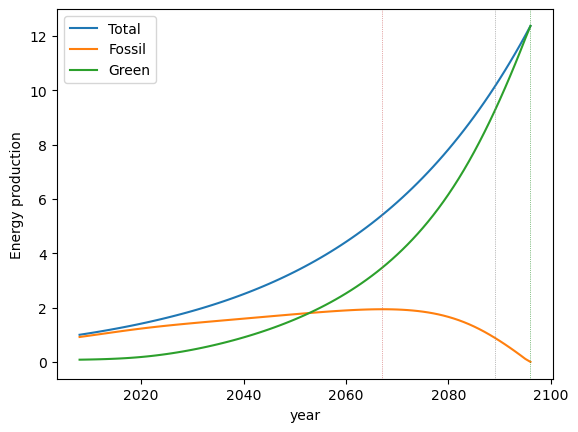

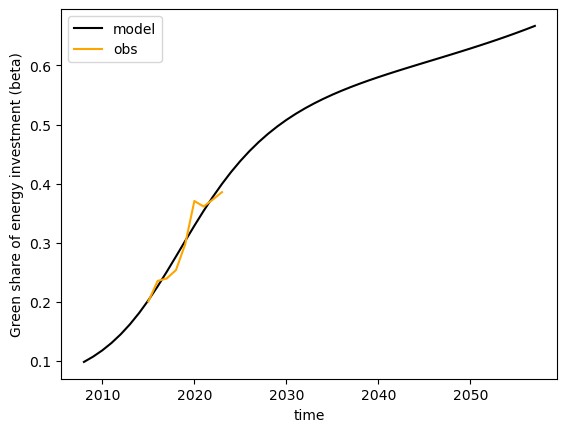

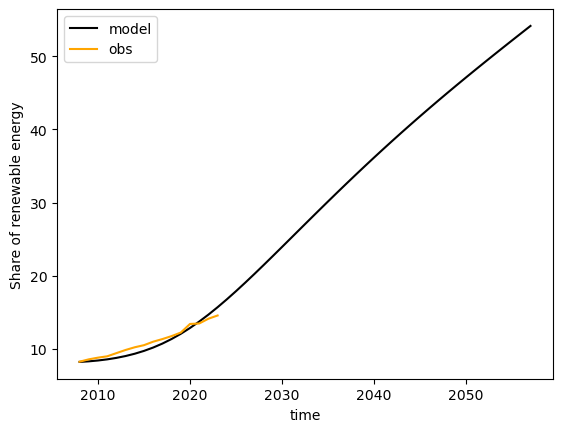

In [135]:
params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

for par, parval in zip(parnames, result.x):
    params[par] = parval

resu = lef.run_model(inicond = lef.inicond_yr(2008), params = params, n_iter = 100, verbose = False, rule = 'maxgreen')
lef.plot_resu(resu, year_ini = 2008)
lef.plot_resuvsobs(resu, year_ini = 2008)

yini = 2008
print(yini + resu['year_peak'], yini + resu['year_halved'], yini + resu['year_zero'])

### only re-tested till here

## 2.1. Improving the fit. Using 2008-2023 for energy share and 2015-2023 for investment share

In [139]:
def cost_function_hist(parset, parnames = ['beta_0', 'r_inv', 'a', 'delta_sig'], params = lef.default_params.copy(), year_ini = 2008, inicond = lef.inicond_yr(2008), verbose = False, I_weight = 1.):

    for parval, pnam in zip(parset, parnames):
        params[pnam] = parval
    
    params['gamma_f'] = params['gamma_g']
    
    resu = lef.run_model(inicond = inicond, params = params, n_iter = 2025 - year_ini, verbose = verbose, rule = 'maxgreen')
    cost = lef.costfun_hist(resu, year_ini = year_ini, I_weight = I_weight)
    if verbose: print(cost)

    return cost

In [142]:
parnames = ['beta_0', 'r_inv', 'a', 'delta_sig']
initial_guess = [0.2, 0.1, 1., 0.7]#, 1.]
bounds = [(-0.5, 0.5), (0.01, 0.4), (0.5, 1.5), (0.2, 2.)]#, (0.5, 1.5)]

params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

year_ini = 2008
verbose = True

# Step 5: Use an optimization function to find the best parameters
result = minimize(cost_function_hist, initial_guess, bounds = bounds, args = (parnames, params, year_ini, lef.inicond_yr(2008), verbose))

      0.54     -0.23      0.08      0.92      0.01      0.36      0.02      0.02
Fossil infrastructure decreasing! 0.01731617026895222 < 0.0183508588
      0.59     -0.07      0.10      0.93      0.02      0.37      0.02      0.02
Fossil infrastructure decreasing! 0.01571727784261916 < 0.018340511914689522
      0.63      0.07      0.12      0.94      0.03      0.37      0.03      0.01
Fossil infrastructure decreasing! 0.014721942632049555 < 0.018314279573968816
      0.65      0.17      0.15      0.94      0.04      0.37      0.03      0.01
Fossil infrastructure decreasing! 0.014125612497624103 < 0.018278356204549623
      0.67      0.26      0.17      0.95      0.04      0.38      0.03      0.01
Fossil infrastructure decreasing! 0.01379188060165338 < 0.018236828767480368
      0.69      0.32      0.20      0.95      0.06      0.38      0.03      0.01
Fossil infrastructure decreasing! 0.013636855528339733 < 0.0181923792858221
      0.70      0.38      0.23      0.96      0.07      0.3

/home/fedef/Research/abstractsepapers/papers/DREAM/codes/lib_ecofun.py:246: RuntimeWarning: divide by zero encountered in scalar divide
  if verbose: print((8*'{:10.2f}').format(beta, (Pg/Kg - Pf/Kf)/(Pf/Kf), Eg, Ef, Pg, Pf, Ig, If))


ValueError: operands could not be broadcast together with shapes (4,) (9,) 

In [13]:
print(result)

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 35.01944490239206
        x: [-1.793e-01  6.461e-01  1.706e-02  3.000e-01]
      nit: 46
      jac: [-1.444e-02 -1.121e-02  8.137e-02  7.646e+01]
     nfev: 510
     njev: 102
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


2026 2054 2063


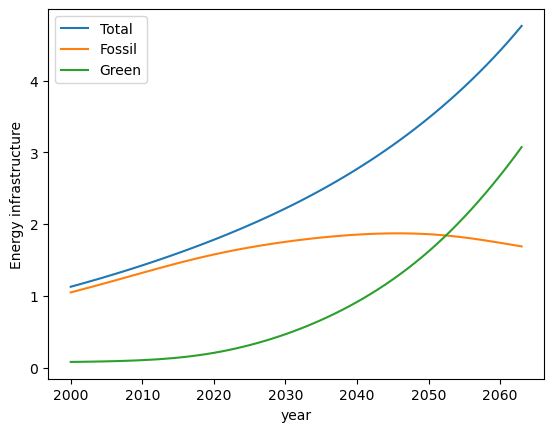

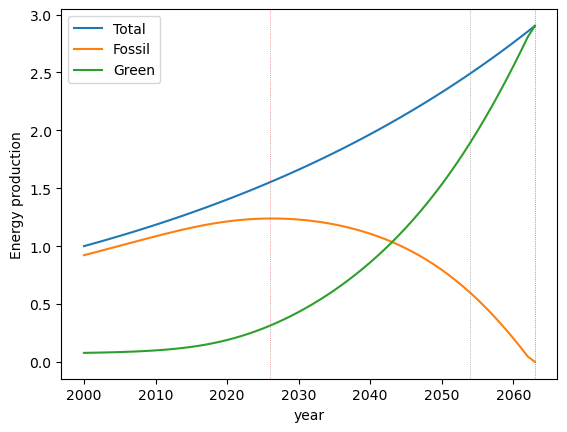

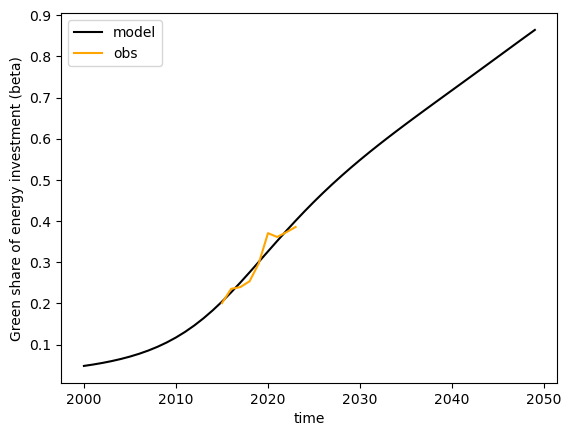

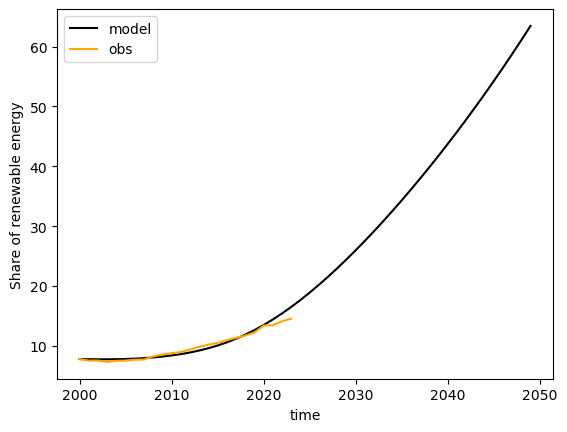

In [14]:
params['beta_0'], params['gamma_g'], params['growth'], params['delta_sig'] = result.x

resu = lef.run_model(inicond = lef.inicond_2000, params = params, n_iter = 100, verbose = False, rule = 'maxgreen')
lef.plot_resu(resu, year_ini = 2000)
lef.plot_resuvsobs(resu, year_ini = 2000)#, ind_ini = 0, ind_fin = 24)

yini = 2000
print(yini + resu['year_peak'], yini + resu['year_halved'], yini + resu['year_zero'])

In [38]:
params

{'growth': 0.017055428532726295,
 'eps': 1,
 'a': 1,
 'b': 1,
 'gamma_f': 0.5,
 'gamma_g': 0.6460875554154768,
 'eta_g': 0.2,
 'eta_f': 0.2,
 'h_g': 0.5,
 'h_f': 0.5,
 'r_inv': 0.1,
 'beta_0': -0.1792655638830066,
 'delta_sig': 0.3,
 'delta_g': 0.01,
 'delta_f': 0.01,
 'f_heavy': 0.1}

## 2.2. Same, but weighting more the energy share

With I_weight = 0.1, the transition is slowed. Green energy share is quite sensitive to this..

In [15]:
initial_guess = [-0.2, 0.7, 0.02, 0.7]#, 1.]
bounds = [(-0.5, 0.5), (0.3, 0.9), (0.01, 0.03), (0.3, 1.5)]#, (0.5, 1.5)]

params = lef.default_params
year_ini = 2000
verbose = False

I_weight = 0.1

# Step 5: Use an optimization function to find the best parameters
result = minimize(cost_function_hist, initial_guess, bounds = bounds, args = (params, year_ini, lef.inicond_2000, verbose, I_weight))
print(result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 7.499028834025767
        x: [-1.149e-01  5.751e-01  1.878e-02  3.000e-01]
      nit: 44
      jac: [ 3.553e-06  1.954e-06 -1.261e-05  4.713e+01]
     nfev: 360
     njev: 72
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


2030 2061 2070


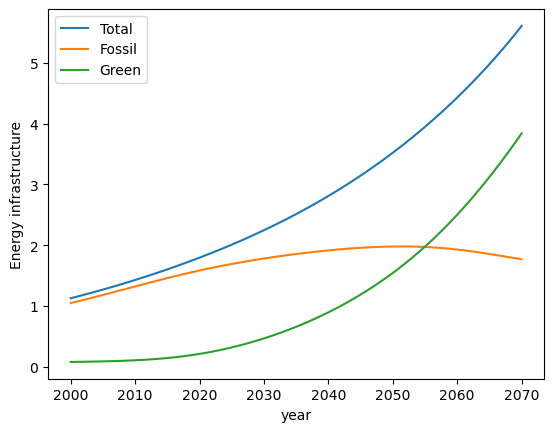

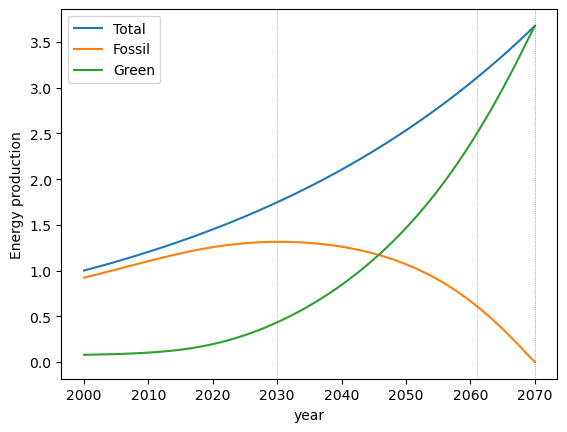

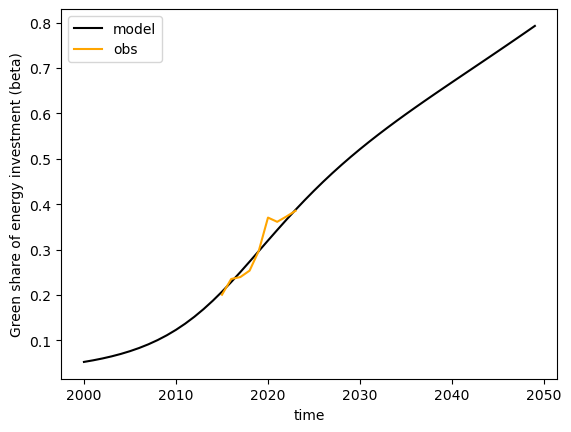

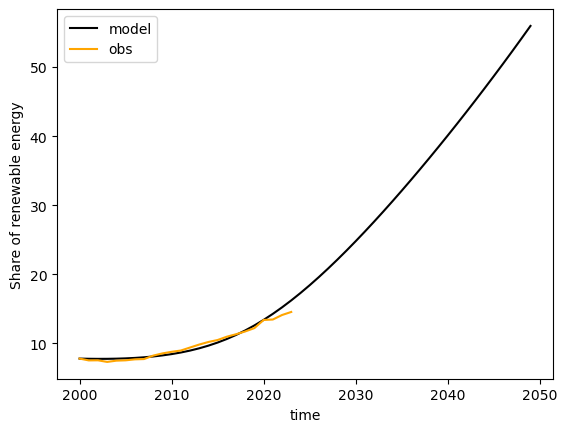

In [16]:
params['beta_0'], params['gamma_g'], params['growth'], params['delta_sig'] = result.x

resu = lef.run_model(inicond = lef.inicond_2000, params = params, n_iter = 100, verbose = False, rule = 'maxgreen')
lef.plot_resu(resu, year_ini = 2000)
lef.plot_resuvsobs(resu, year_ini = 2000)#, ind_ini = 0, ind_fin = 24)

yini = 2000
print(yini + resu['year_peak'], yini + resu['year_halved'], yini + resu['year_zero'])

In [41]:
params

{'growth': 0.01877564045416566,
 'eps': 1,
 'a': 1,
 'b': 1,
 'gamma_f': 0.5,
 'gamma_g': 0.5751197750514625,
 'eta_g': 0.2,
 'eta_f': 0.2,
 'h_g': 0.5,
 'h_f': 0.5,
 'r_inv': 0.1,
 'beta_0': -0.1149135946421199,
 'delta_sig': 0.3,
 'delta_g': 0.01,
 'delta_f': 0.01,
 'f_heavy': 0.1}

## Notes

delta_sig is a fundamental parameter. When too low (< 0.25) the fit fails and actually there is no transition, the system is stuck on fossil. When too large ( e.g. = 1) there is no transition either.. The best value is between 0.3 and 0.4. This may be linked to the normalization of the Rp variable, which is in the range (-1, 1), and sensible to the bounds for $\beta_0$